Got an accuracy of of 0.9925 on test set
Model Architechure:
Convolution((3,3),32) -> MaxPool((2,2),padding=same) -> Convolution((3,3),64) -> MaxPool((3,3),padding=same), Dropout=0.2 -> Convolution((3,3),128) -> MaxPool((2,2),padding=same), Dropout=0.3 -> DenseLayer , Dropout(0.5) -> output

In [48]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [51]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


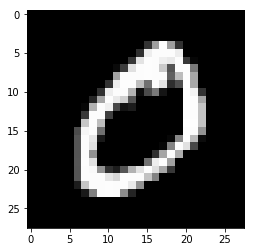

In [52]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

/home/pankaj/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


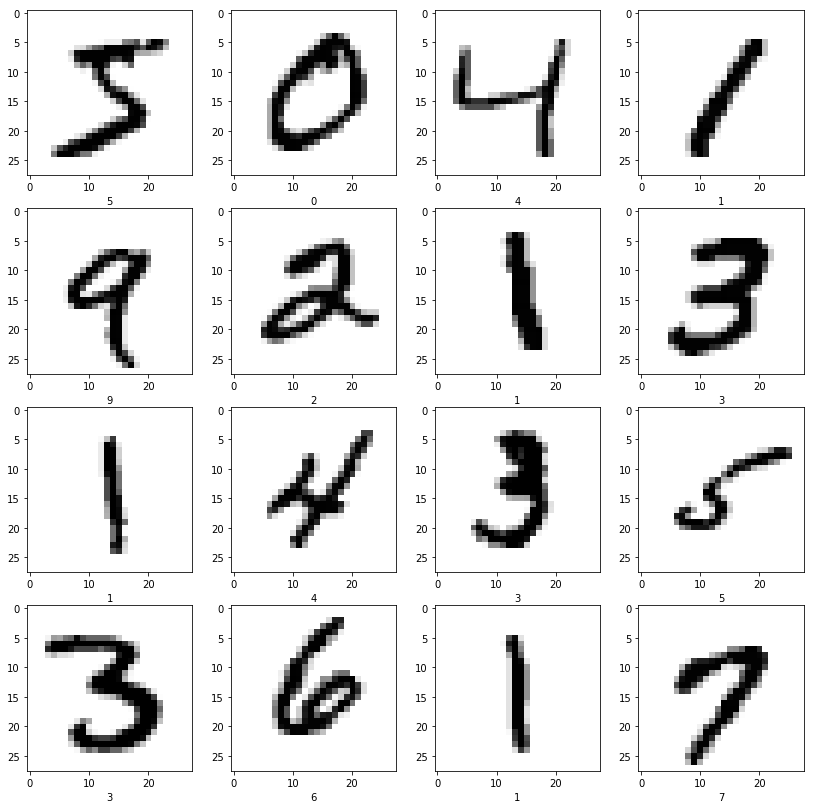

In [53]:
%matplotlib inline

plt.figure(figsize=(14,14))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.grid('off')
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [54]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])

Converting y_test, y_train into cagtegorical format

In [55]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 128)         0         
__________

In [57]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [58]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=8,
         validation_data=(x_train, y_train),
         )

Train on 60000 samples, validate on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2373 - acc: 0.9231 - val_loss: 0.0423 - val_acc: 0.9869
Epoch 2/8
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0702 - acc: 0.9781 - val_loss: 0.0320 - val_acc: 0.9899
Epoch 3/8
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0536 - acc: 0.9834 - val_loss: 0.0232 - val_acc: 0.9931
Epoch 4/8
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0210 - val_acc: 0.9935
Epoch 5/8
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0399 - acc: 0.9876 - val_loss: 0.0168 - val_acc: 0.9951
Epoch 6/8
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0133 - val_acc: 0.9960
Epoch 7/8
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0313 - acc: 0.9903 - val_loss: 0.0105 - val_acc: 0.996

In [59]:
_,accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy)

0.9925
